## Introduction

In the following notebook, I will be preparing Listings data pertaining to San Francisco Airbnb's. Raw data can be found [here](http://insideairbnb.com/get-the-data.html).


**Read in libraries**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

**Set notebook preferences**

In [129]:
#Set options for pandas
pd.set_option('display.max_columns',1_000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)

#Set style for plot
plt.style.use('ggplot')

#Set path to visuals from EDA
visualizations = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Visualizations\Listings EDA/'

**Read in data**

In [130]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\02_Cleaned'

#Read in data
df = pd.read_csv(path + '/2020_0520_Listings_Cleaned.csv', index_col=0, parse_dates=['host_since','first_review','last_review'],
                 dtype = {'review_scores_accuracy':'category','review_scores_checkin':'category',
                          'review_scores_cleanliness':'category','review_scores_communication':'category',
                          'review_scores_rating':'category','review_scores_location':'category', 'review_scores_value':'category',
                         'zipcode':'object'}
                )

### Data Overview

In [131]:
#Preview data
print('Data shape:',df.shape)
display(df.head(3))

Data shape: (113976, 72)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_nights,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price,zipcode
0,"*Full access to patio and backyard (shared with us and our dog who live upstairs) *Beautiful garden with fruit trees, native plants and lawn *Washer and dryer *Children s toys *Charcoal grill",3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s), Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First aid kit...",25,106,43,58,1.0,Real Bed,1.0,2.0,1,0,0,3 weeks ago,moderate,San Francisco,100.0,New update: the house next door is under construction and there is the possibility of noise from 7am - 5pm. Our rates are discounted during this time period. Our bright garden unit overlooks a gra...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2011. We have a new puppy (Feb 2017) named Tucker who is part black lab and part border collie.,1.0,1169,1.0,1.0,1.0,"San Francisco, California, United States",Holly,90.0,within an hour,2008-07-31,"email , phone , facebook , reviews , kba",* No Pets - even visiting guests for a short time period. * No Smokers allowed - even if smoking off premises.,958,1,"A family of 4 lives upstairs with their dog. Normally we are able to meet guests, but we like to give people their privacy and mostly leave them alone. We are always available if anything is neede...",1,2020-03-13,37.76931,STR-0001256,-122.43386,1125,1,4200.0,"Bright, Modern Garden Unit - 1BR/1B","*Quiet cul de sac in friendly neighborhood *Steps away from grassy park with 2 playgrounds and Recreational Center *Very family-friendly neighborhood *Quaint shops, grocery stores and restaurants ...",Western Addition,"Due to the fact that we have children and a dog, we are up early 7-8am and their footsteps or paws can be heard from the apartment. Our place is ideal for early risers or hard sleepers who appreci...",240,56,170.0,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.84,Entire home/apt,100.0,"Newly remodeled, modern, and bright garden unit in historic Victorian home. *New fixtures and finishes. *Organic cotton sheets and towels. *Zero VOC and non-toxic Yolo paint. *Organic and fair-tr...",New update: the house next door is under construction and there is the possibility of noise from 7am - 5pm. Our rates are discounted during this time period. Our bright garden unit overlooks a gra...,"*Public Transportation is 1/2 block away. *Centrally located with easy access to major lines of public transportation (N-Judah, Haight #7, J-Church, Fillmore, and Bart) *No Parking is offered. *...",1120.0,94117
1,"Our deck, garden, gourmet kitchen and extensive art, design and literature library.",5,"Internet,Wifi,Kitchen,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , First aid kit , Fire extinguisher ,Essentials,Shampoo,Hangers, Hair dryer ,Iron, Laptop friendly workspace , Pri...",0,0,0,0,1.0,Real Bed,2.0,3.0,1,0,0,2 weeks

### Quick EDA

**Price Distribution**

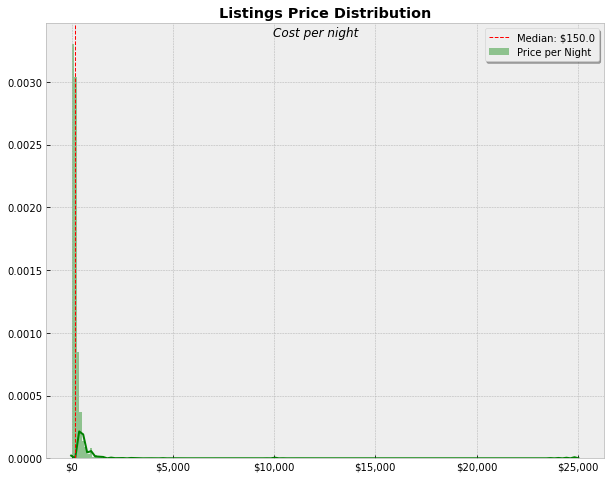

In [132]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename= visualizations +  'price_hist.png', width=700, height=400)

**Price by Neighborhood**

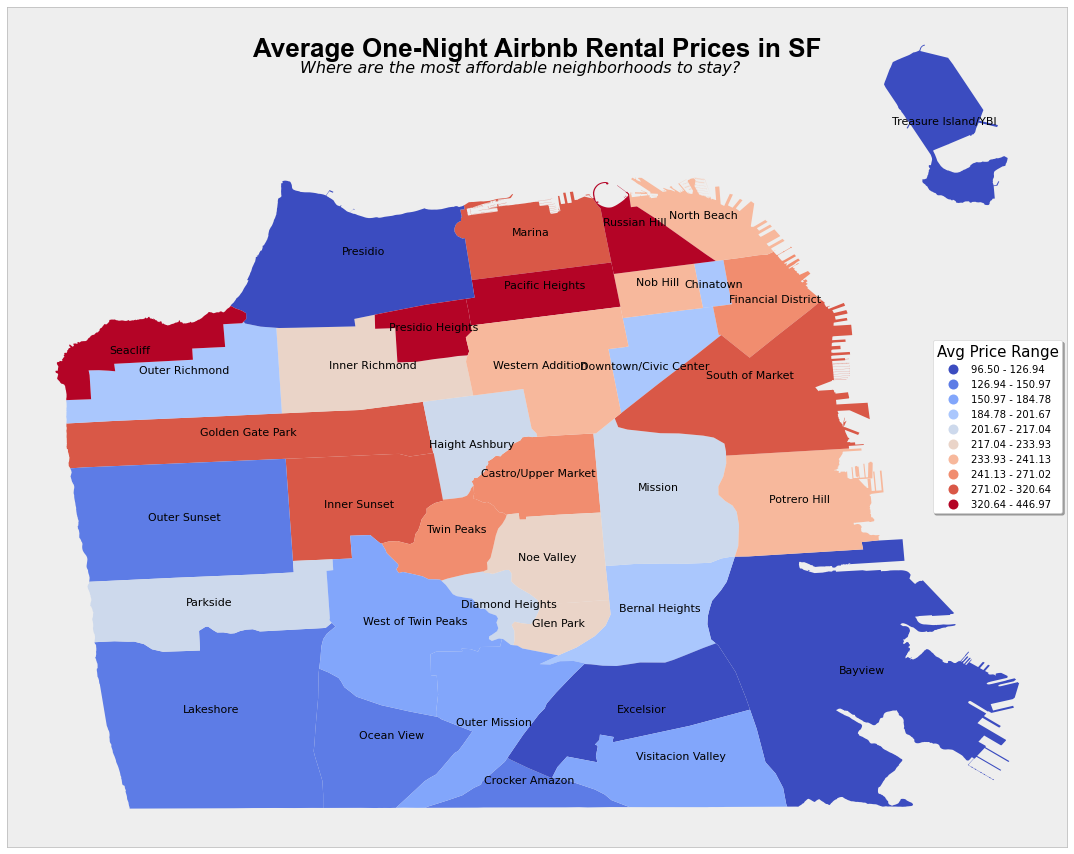

In [133]:
Image(filename= visualizations +  'geopandas_rent.png', width=900, height=900)

**Price by Month**

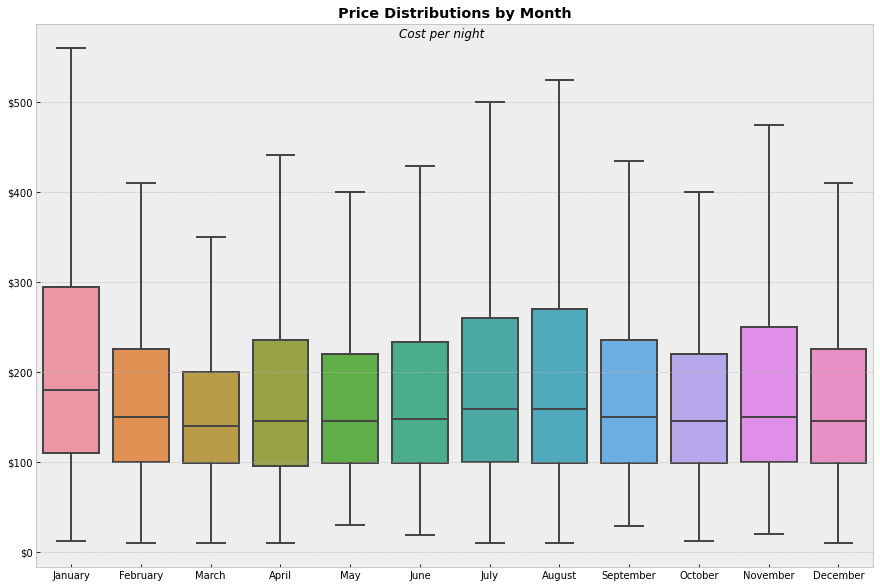

In [134]:
Image(filename= visualizations +  'month_price_box.png', width=700, height=400)

**Price by Day**

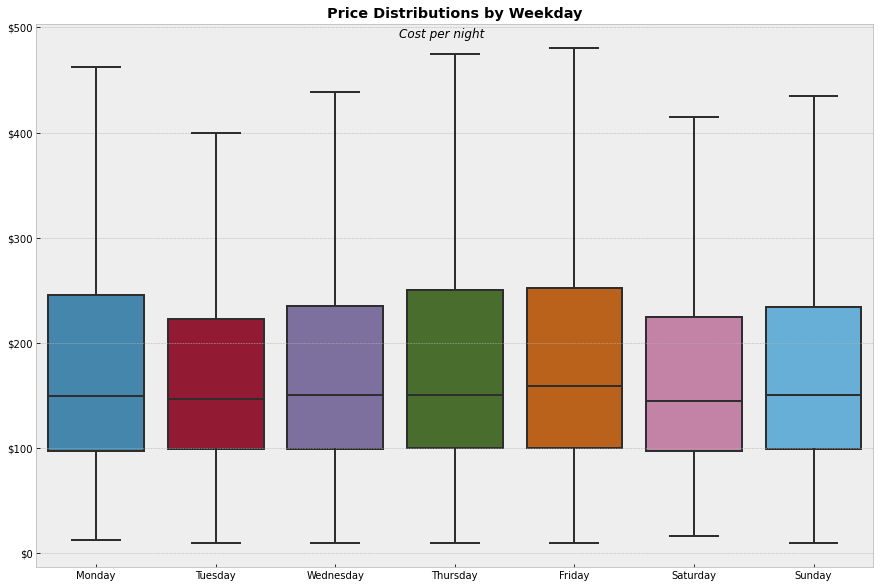

In [135]:
Image(filename= visualizations +  'weekday_price_box.png', width=700, height=400)

### Preprocessing

#### Drop Unnecessary columns

In [136]:
#Cols containing text data not needed for machine learning
cols =['notes','access', 'interaction', 'transit', 'house_rules', 'neighborhood_overview', 
       'description','host_id','id','name','summary','host_about', 'license','calendar_updated',
       'space', 'host_location', 'host_name','monthly_price', 'weekly_price']

#Drop cols
df.drop(cols, axis = 1, inplace = True)

### Feature Engineering

**Extract date information**

In [137]:
#Extract time data from datetime64 cols
for col in df.select_dtypes('datetime64'):
    df[col + '_year'] = df[col].dt.year.astype('object')
    df[col + '_month'] = df[col].dt.month_name()
    df[col + '_weekday'] = df[col].dt.day_name()

#Drop original date columns
df.drop(['first_review','host_since','last_review'],axis = 1,inplace = True)

#Check
display(df.iloc[:,-9:].head(3))
print(df.shape)

,first_review_year,first_review_month,first_review_weekday,host_since_year,host_since_month,host_since_weekday,last_review_year,last_review_month,last_review_weekday
0,2009,July,Thursday,2008,July,Thursday,2020,March,Friday
1,2009,May,Sunday,2009,March,Monday,2017,August,Sunday
2,2009,August,Monday,2009,June,Wednesday,2020,March,Friday


(113976, 59)


**Add amenities_count**

In [138]:
#Get a count of in lower_case amenities
df['amenities'] = df['amenities'].str.lower()
df['amenities_count'] = df['amenities'].str.count(',') + 1 #count commas and add 1 for last word

#Check size of df
print(df.shape)

(113976, 60)


#### Dummy Variables

In [139]:
#Capture object cols 
cols = df.select_dtypes(['object','category']).columns.tolist()

#Remove amenities,host_verifications from cols
cols = [ elem for elem in cols if elem not in('amenities','host_verifications')] 

#Convert cols to dummys
df = pd.get_dummies(df, columns=cols)

#Check
print('Current data size:', df.shape)
display(df.head())

Current data size: (113976, 362)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_verifications,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,number_of_reviews,number_of_reviews_ltm,price,require_guest_phone_verification,require_guest_profile_picture,requires_license,reviews_per_month,security_deposit,amenities_count,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_luxury moderate,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict 14 with grace period,cancellation_policy_super strict 30,cancellation_policy_super strict 60,city_Daly City,city_San Francisco,city_San Jose,city_South San Francisco,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,neighbourhood_cleansed_Golden Gate Park,neighbourhood_cleansed_Haight Ashbury,neighbourhood_cleansed_Inner Richmond,neighbourhood_cleansed_Inner Sunset,neighbourhood_cleansed_Lakeshore,neighbourhood_cleansed_Marina,neighbourhood_cleansed_Mission,neighbourhood_cleansed_Nob Hill,neighbourhood_cleansed_Noe Valley,neighbourhood_cleansed_North Beach,neighbourhood_cleansed_Ocean View,neighbourhood_cleansed_Outer Mission,neighbourhood_cleansed_Outer Richmond,neighbourhood_cleansed_Outer Sunset,neighbourhood_cleansed_Pacific Heights,neighbourhood_cleansed_Parkside,neighbourhood_cleansed_Potrero Hill,neighbourhood_cleansed_Presidio,neighbourhood_cleansed_Presidio Heights,neighbourhood_cleansed_Russian Hill,neighbourhood_cleansed_Seacliff,neighbourhood_cleansed_South of Market,neighbourhood_cleansed_Treasure Island/YBI,neighbourhood_cleansed_Twin Peaks,neighbourhood_cleansed_Visitacion Valley,neighbourhood_cleansed_West of Twin Peaks,neighbourhood_cleansed_Western Addition,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Condominium,property_type_Cottage,property_type_Cycladic house (Greece),property_type_Dome house,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_In-law,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,review_scores_accuracy_10.0,review_scores_accuracy_2.0,review_scores_accuracy_3.0,review_scores_accuracy_4.0,review_scores_accuracy_5.0,review_scores_accuracy_6.0,review_scores_accuracy_7.0,review_scores_accuracy_8.0,review_scores_accuracy_9.0,review_scores_accuracy_No review data,review_scores_checkin_10.0,review_scores_checkin_2.0,review_scores_checkin_4.0,review_scores_checkin_5.0,review_scores_checkin_6.0,review_scores_checkin_7.0,review_scores_checkin_8.0,review_scores_checkin_9.0,review_scores_checkin_No review data,review_scores_cleanliness_10.0,review_scores_cleanliness_2.0,review_scores_cleanliness_3.0,review_scores_cleanliness_4.0,review_scores

**Get dummies for amenities and host_verifications**

In [140]:
#Get dummies from amenities and host_verifications and store in sep df's
amenities_dummies = df['amenities'].str.get_dummies(sep = ',')
host_verifications_dummies = df['host_verifications'].str.get_dummies(sep=',')

#Concatenate dummies
dummies= pd.concat([amenities_dummies, host_verifications_dummies], axis=1)

#Clean-up dummiies
dummies.columns = dummies.columns.str.strip() #strip white space from header edges
dummies.columns = dummies.columns.str.replace(' ', '_') #Replace white space withing header name
dummies = dummies.loc[:,~dummies.columns.duplicated()] #Drop duplicate columns

#Remove column headers shorter than 3 characters in length
for col in dummies.columns: 
    if len(col) < 3:
        dummies.drop(columns= col, inplace=True)

#Combine dummies and df
df = pd.concat([df, dummies], axis=1)

#Drop amenities column, host_verifications,None. Sort cols alphabetically
df.drop(columns = ['amenities','host_verifications','None'], inplace = True)
df = df.reindex(sorted(df.columns), axis = 1)

#Check
print('Shape of data: ', df.shape)
display(df.head())

Shape of data:  (113976, 612)


,24-hour_check-in,accessible-height_bed,accessible-height_toilet,accommodates,air_conditioning,air_purifier,alarm_system,amazon_echo,amenities_count,apple_tv,availability_30,availability_365,availability_60,availability_90,baby_bath,baby_monitor,babysitter_recommendations,baking_sheet,balcony,barbecue_utensils,bath_towel,bathroom_essentials,bathrooms,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bedroom_comforts,bedrooms,beds,bidet,body_soap,bread_maker,breakfast,breakfast_bar,breakfast_table,building_staff,buzzer/wireless_intercom,cable_tv,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy_flexible,cancellation_policy_luxury moderate,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict 14 with grace period,cancellation_policy_super strict 30,cancellation_policy_super strict 60,carbon_monoxide_detector,cat(s),ceiling_fan,central_air_conditioning,changing_table,chef_s_kitchen,children’s_books_and_toys,children’s_dinnerware,city_Daly City,city_San Francisco,city_San Jose,city_South San Francisco,cleaning_before_checkout,cleaning_fee,coffee_maker,convection_oven,cooking_basics,courtyard,crib,day_bed,desk,dining_area,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,driveway_parking,dryer,dual_vanity,dvd_player,electric_profiling_bed,elevator,email,en_suite_bathroom,espresso_machine,essentials,ethernet_connection,ev_charger,exercise_equipment,extra_people,extra_pillows_and_blankets,extra_space_around_bed,extra_space_around_shower_and_toilet,facebook,family/kid_friendly,fax_machine,fire_extinguisher,fire_pit,fireplace_guards,firm_mattress,first_aid_kit,first_review_month_April,first_review_month_August,first_review_month_December,first_review_month_February,first_review_month_January,first_review_month_July,first_review_month_June,first_review_month_March,first_review_month_May,first_review_month_November,first_review_month_October,first_review_month_September,first_review_weekday_Friday,first_review_weekday_Monday,first_review_weekday_Saturday,first_review_weekday_Sunday,first_review_weekday_Thursday,first_review_weekday_Tuesday,first_review_weekday_Wednesday,first_review_year_2009.0,first_review_year_2010.0,first_review_year_2011.0,first_review_year_2012.0,first_review_year_2013.0,first_review_year_2014.0,first_review_year_2015.0,first_review_year_2016.0,first_review_year_2017.0,first_review_year_2018.0,first_review_year_2019.0,first_review_year_2020.0,fixed_grab_bars_for_shower,fixed_grab_bars_for_toilet,flat_path_to_front_door,flat_path_to_guest_entrance,formal_dining_area,free_parking_on_premises,free_street_parking,full_kitchen,game_console,garage_parking,garden_or_backyard,gas_fireplace,gas_oven,google,government_id,ground_floor_access,guests_included,gym,hair_dryer,hammock,handheld_shower_head,hangers,hbo_go,heat_lamps,heated_floors,heated_towel_rack,heating,high-resolution_computer_monitor,high_chair,home_theater,host_greets_you,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_since_month_April,host_since_month_August,host_since_month_December,host_since_month_February,host_since_month_January,host_since_month_July,host_since_month_June,host_since_month_March,host_since_month_May,host_since_month_November,host_since_month_October,host_since_month_September,host_since_weekday_Friday,host_since_weekday_Monday,host_since_weekday_Saturday,host_since_weekday_Sunday,host_since_weekday_Thursday,host_since_weekday_Tuesday,host_since_weekday_Wednesday,host_since_year_2008.0,host_since_year_2009.0,host_since_year_2010.0,host_since_year_2011.0,host_since_year_

**Write Training and Test Data to CSV**

In [126]:
#Set path to save files
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\03_Processed'

#Write files
df.to_csv(path + '/2020_0608_Listings_Processed.csv')
